# Zaman Serisi Oluşturma

##### Veriler https://corona.cbddo.gov.tr/Home/History sitesinden alınmıştır

##### Siteden aldığımız veriyi notebook ortamında göstermek için pandas modülü eklenir

In [1]:
import pandas as pd

##### İstenilen veri seçilir

In [2]:
data=pd.read_excel("data/turkiyecorona.xlsx")
df=data.copy()

##### Verinin ilk 5 tanesi gösterilecek şekilde ortamda gösterilir

In [3]:
df.head()

,Ülke,Bölge,Tanı,Ölüm,İyileşen,Tarih
0,Türkiye,NaN,34109,725,1582,4/7/2020
1,Türkiye,NaN,30217,649,1326,4/6/2020
2,Türkiye,NaN,27069,574,1042,4/5/2020
3,Türkiye,NaN,23934,501,786,4/4/2020
4,Türkiye,NaN,20921,425,484,4/3/2020


##### Veride kaç (satır,sütun) var diye incelenir

In [4]:
df.shape

(28, 6)

##### Veride boş değer olup olmadığını eğer boş varsa kaç tane boş değer var diye kontrol edilir.(Bölge sütunu hiç doldurulmamış)

In [5]:
df.isnull().sum()

Ülke         0
Bölge       28
Tanı         0
Ölüm         0
İyileşen     0
Tarih        0
dtype: int64

##### Veride 'Bölge' sütunu boş olduğundan ve 'Ülke' sütununda satece Türkiye bulunduğundan keyfi olarak o satırlar silinir

In [6]:
df.drop(["Ülke","Bölge"],axis=1,inplace=True)

##### Güncellenen verinin ilk 5 satırı gösterilir

In [7]:
df.head()

,Tanı,Ölüm,İyileşen,Tarih
0,34109,725,1582,4/7/2020
1,30217,649,1326,4/6/2020
2,27069,574,1042,4/5/2020
3,23934,501,786,4/4/2020
4,20921,425,484,4/3/2020


##### Sütunların veri tiplerine bakılır

In [8]:
df.dtypes

Tanı         int64
Ölüm         int64
İyileşen     int64
Tarih       object
dtype: object

##### İndex kısmına tarihin değerleri atanır.Tarih object olduğundan index'in veri tipi date olarak çevirilir

In [9]:
df.index=df["Tarih"]
df.index=pd.DatetimeIndex(df.index)

##### Verinin ilk 5 satırı gösterilir

In [10]:
df.head()

,Tanı,Ölüm,İyileşen,Tarih
Tarih,,,,
2020-04-07,34109,725,1582,4/7/2020
2020-04-06,30217,649,1326,4/6/2020
2020-04-05,27069,574,1042,4/5/2020
2020-04-04,23934,501,786,4/4/2020
2020-04-03,20921,425,484,4/3/2020


##### Sıralama 'bugünden geçmişe' olarak ayarlandığından dolayı keyfi olarak sıralama 'geçmişten bugüne' olacak şekilde ayarlama yapılır

In [11]:
df=df[::-1]

##### Verinin güncellenmiş şekli gösterilir

In [12]:
df.head()

,Tanı,Ölüm,İyileşen,Tarih
Tarih,,,,
2020-03-11,1,0,0,3/11/2020
2020-03-12,1,0,0,3/12/2020
2020-03-13,5,0,0,3/13/2020
2020-03-14,6,0,0,3/14/2020
2020-03-15,18,0,0,3/15/2020


##### Değişkenlerin istatistiksel olarak yapısı incelenir

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tanı,28.0,8206.464286,10557.198936,1.0,167.75,2152.5,14068.00,34109.0
Ölüm,28.0,160.857143,220.442436,0.0,2.50,51.5,229.75,725.0
İyileşen,28.0,237.214286,430.791120,0.0,0.00,13.0,265.50,1582.0


##### Değişkenler arasındaki ilişki istatistiksel olarak incellenir

In [14]:
df.corr()

,Tanı,Ölüm,İyileşen
Tanı,1.000000,0.994058,0.947408
Ölüm,0.994058,1.000000,0.969003
İyileşen,0.947408,0.969003,1.000000


##### Görselleştirme araçlarından birisi olan seaborn modülü kullanılır

In [15]:
import seaborn as sns

In [16]:
sns.set_context("poster")
sns.set(rc={"figure.figsize":(16,7)})
sns.set_style("whitegrid")

##### Tanı değişkenin zaman içindeki ilişkisi görsel olarak incelenir

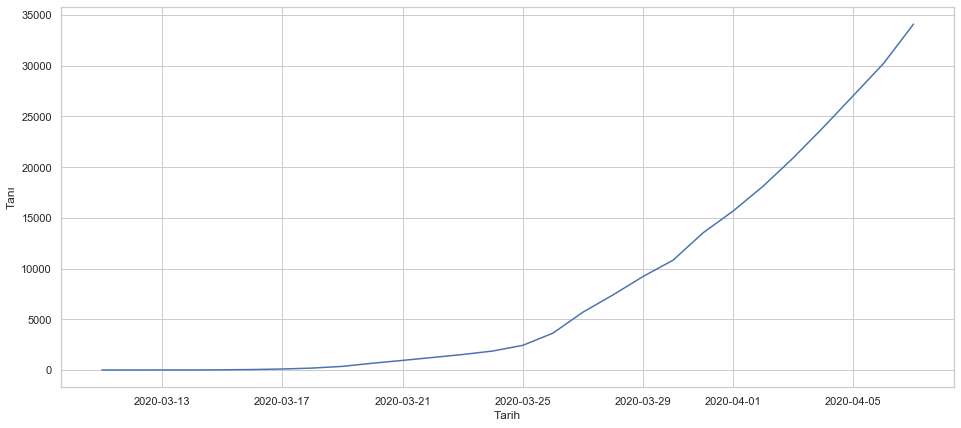

In [25]:
sns.lineplot(x=df.index,y=df["Tanı"])

##### Ölüm değişkenin zaman içindeki ilişkisi görsel olarak incelenir

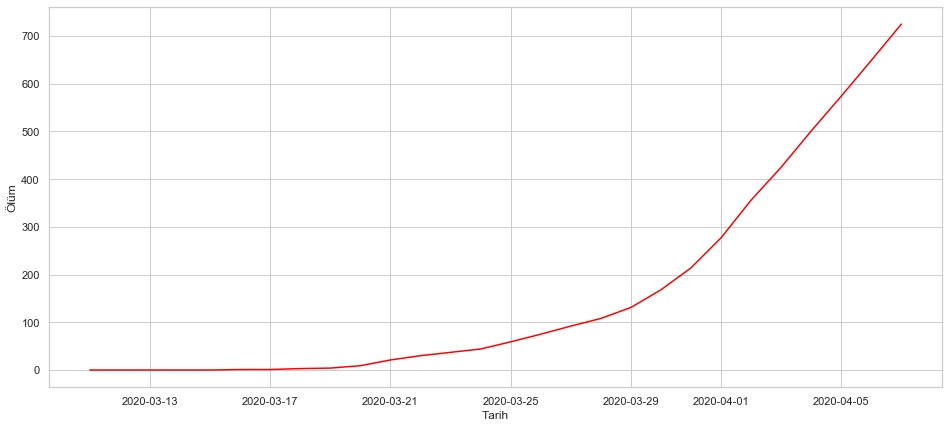

In [18]:
sns.lineplot(x=df.index,y=df["Ölüm"],color="red")

##### İyileşen değişkenin zaman içindeki ilişkisi görsel olarak incelenir

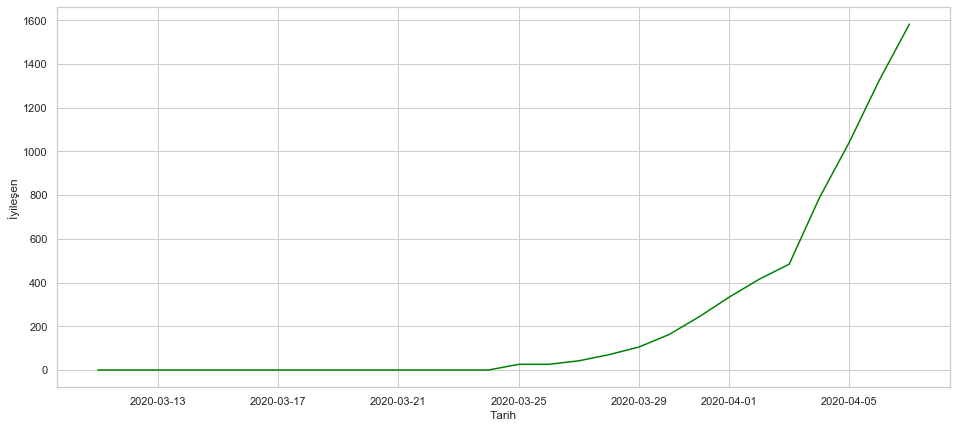

In [19]:
sns.lineplot(x=df.index,y=df["İyileşen"],color="green")

##### 3 Değişkenin (Tanı,Ölüm,İyileşen) aynı tabloda zaman içindeki ilişkisi görsel incelenir

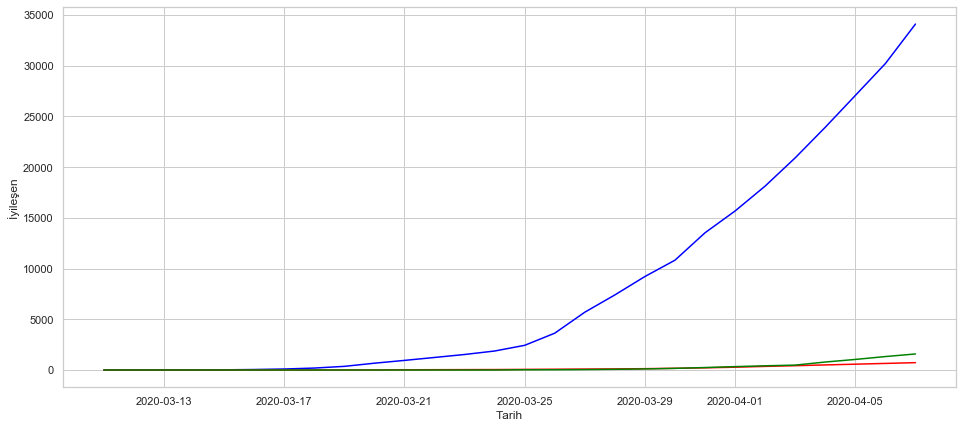

In [20]:
sns.lineplot(x=df.index,y=df["Tanı"],color="blue")
sns.lineplot(x=df.index,y=df["Ölüm"],color="red")
sns.lineplot(x=df.index,y=df["İyileşen"],color="green")

##### Diğer görselleştirme aracı olan matplotlib modülü eklenir

In [21]:
import matplotlib.pyplot as plt

##### 3 Değişkenin (Tanı,Ölüm,İyileşen) aynı tabloda zaman içindeki ilişkisi görsel incelenir

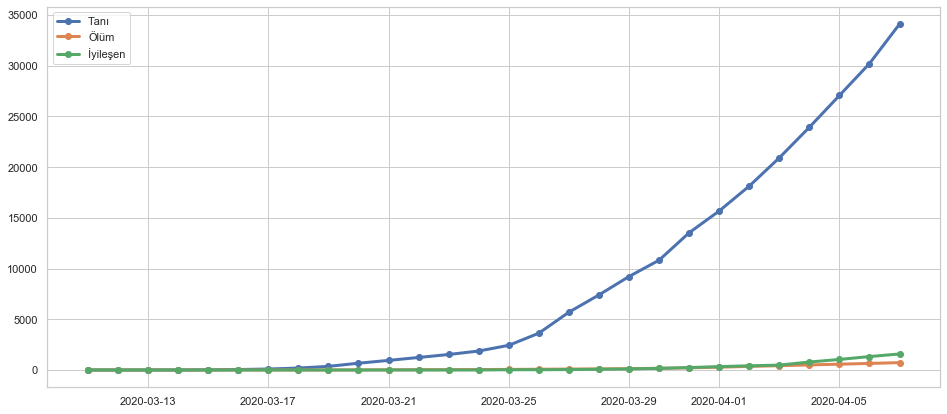

In [22]:
plt.plot(df["Tanı"],marker="o",lw=3)
plt.plot(df["Ölüm"],marker="o",lw=3)
plt.plot(df["İyileşen"],marker="o",lw=3)
plt.legend(["Tanı","Ölüm","İyileşen"],loc="upper left")

##### Zaman değişkeninde kısaltma yapılır.(Nisan'ın 1. gününden 7.günene kadar)

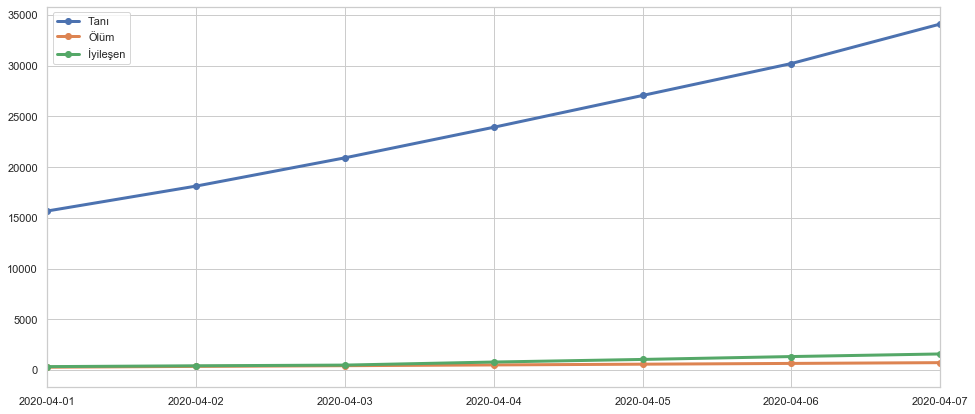

In [23]:
plt.plot(df["Tanı"],lw=3,marker="o")
plt.plot(df["Ölüm"],lw=3,marker="o")
plt.plot(df["İyileşen"],lw=3,marker="o")
plt.xlim("2020-04-01","2020-04-7")
plt.legend(["Tanı","Ölüm","İyileşen"],loc="upper left")

##### Zaman değişkeninde kısaltma yapılır.(Mart ayının 11.gününden 31.gününe kadar)

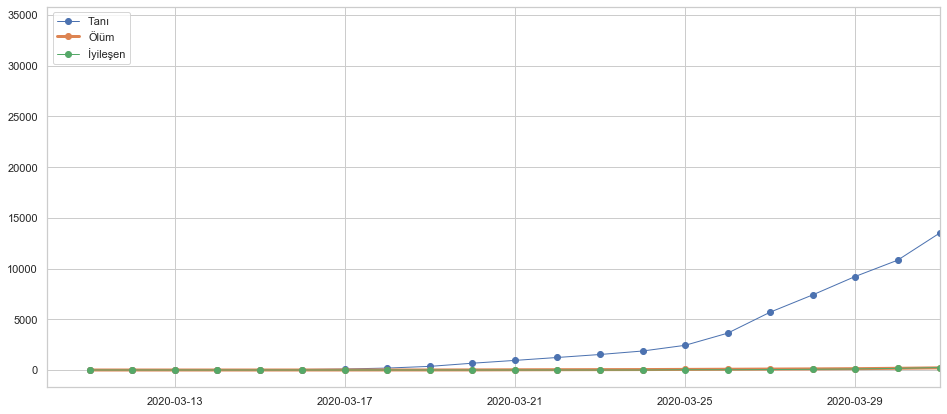

In [24]:
plt.plot(df["Tanı"],marker="o",lw=1)
plt.plot(df["Ölüm"],marker="o",lw=3)
plt.plot(df["İyileşen"],marker="o",lw=1)
plt.xlim("2020-03-10","2020-03-31")
plt.legend(["Tanı","Ölüm","İyileşen"],loc="upper left")